In [2]:
import numpy  as  np
import tensorflow  as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from os import listdir
from os.path import isfile, join
import re

from random import randint
import datetime

In [2]:
quotes_data  = pd.read_csv("quotes_all.csv",delimiter=';')

In [3]:
quotes_data.head()

,Quote,Author,Topic
0,Age is an issue of mind over matter. If you do...,Mark Twain,age
1,"Anyone who stops learning is old, whether at t...",Henry Ford,age
2,Wrinkles should merely indicate where smiles h...,Mark Twain,age
3,True terror is to wake up one morning and disc...,Kurt Vonnegut,age
4,A diplomat is a man who always remembers a wom...,Robert Frost,age


In [4]:
quotes_data['Topic'].unique()

array(['age', 'alone', 'amazing', 'anger', 'anniversary', 'architecture',
       'art', 'attitude', 'beauty', 'best', 'birthday', 'business', 'car',
       'change', 'communication', 'computers', 'cool', 'courage', 'dad',
       'dating', 'death', 'design', 'diet', 'dreams', 'education',
       'environmental', 'equality', 'experience', 'failure', 'faith',
       'family', 'famous', 'fear', 'finance', 'fitness', 'food',
       'forgiveness', 'freedom', 'friendship', 'funny', 'future',
       'gardening', 'god', 'good', 'government', 'graduation', 'great',
       'happiness', 'health', 'history', 'home', 'hope', 'humor',
       'imagination', 'inspirational', 'intelligence', 'jealousy',
       'knowledge', 'leadership', 'learning', 'legal', 'life', 'love',
       'marriage', 'medical', 'men', 'mom', 'money', 'morning',
       'motivational', 'movies', 'movingon', 'music', 'nature',
       'parenting', 'patience', 'patriotism', 'peace', 'pet', 'poetry',
       'politics', 'positive', 'po

What is the distribution of Quotes over the topics?

In [5]:
quotes_data['Topic'].unique().size

117

In [48]:
topic_counts = []
for topic in quotes_data['Topic'].unique():
    topic_counts.append(sum(quotes_data['Topic']==topic))

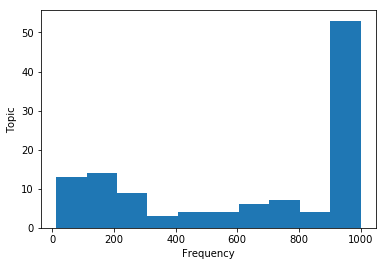

In [49]:
plt.hist(topic_counts)
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.show()

In [6]:
labels_encode={}
labels_decode={}
for i, topic in enumerate(quotes_data['Topic'].unique()):
    labels_encode[topic] = i
    labels_decode[i] = topic

In [7]:
# print(labels_encode, labels_decode)

In [52]:
less_topic = []
less_count = []
for i,count in enumerate(topic_counts):
    if count < 900:
            less_count.append(count)
            less_topic.append(labels_decode[i])
            print(labels_decode[i], count)
            
            
len(less_topic)

anger 329
anniversary 70
architecture 287
attitude 493
birthday 178
car 762
communication 282
computers 266
cool 886
courage 614
dating 191
design 445
diet 259
dreams 799
environmental 241
equality 279
failure 710
famous 700
finance 179
fitness 172
forgiveness 153
friendship 435
gardening 87
graduation 110
humor 539
imagination 700
inspirational 169
intelligence 618
jealousy 106
leadership 562
legal 352
medical 299
morning 880
motivational 111
movingon 76
parenting 146
patience 231
patriotism 154
pet 165
poetry 874
positive 627
romantic 417
sad 578
smile 326
sports 730
strength 735
sympathy 175
teacher 544
technology 886
teen 150
thankful 150
travel 639
trust 802
wedding 179
wisdom 727
christmas 283
easter 41
fathersday 15
memorialday 29
mothersday 24
newyears 36
saintpatricksday 12
thanksgiving 59
valentinesday 42


64

In [53]:
counter = 0
topic_counter = 0
for i,count in enumerate(topic_counts):
    if count > 900:
            print(labels_decode[i], count)
            counter+=count
            topic_counter+=1

print(counter, topic_counter)

age 998
alone 999
amazing 959
art 1000
beauty 972
best 999
business 1000
change 994
dad 1000
death 1000
education 998
experience 999
faith 999
family 999
fear 1000
food 997
freedom 996
funny 999
future 999
god 997
good 998
government 1000
great 998
happiness 999
health 999
history 1000
home 1000
hope 999
knowledge 998
learning 990
life 997
love 997
marriage 998
men 995
mom 998
money 1000
movies 1000
music 999
nature 1000
peace 999
politics 1000
power 999
relationship 999
religion 1000
respect 998
science 1000
society 998
success 996
time 996
truth 1000
war 1000
women 998
work 999
52851 53


In [54]:
# for i,topic in enumerate(quotes_data.Topic == 'knowledge'):
#     if topic:
#         print(quotes_data.iloc[i][0])

Removing some topics from DF:

In [14]:
for topic in less_topic:
    quotes_data = quotes_data[quotes_data.Topic !=topic]

Removing all but knowledge and death:

In [8]:
quotes_data = quotes_data[(quotes_data['Topic'] =='knowledge') | (quotes_data['Topic'] =='death')]

In [9]:
quotes_data = quotes_data.reset_index(drop=True)

In [10]:
quotes_data.shape

(1998, 3)

In [11]:
quotes_data.head()

,Quote,Author,Topic
0,A man who won't die for something is not fit t...,"Martin Luther King, Jr.",death
1,To be idle is a short road to death and to be ...,Buddha,death
2,The fear of death is the most unjustified of a...,Albert Einstein,death
3,The fear of death follows from the fear of lif...,Mark Twain,death
4,Death is no more than passing from one room in...,Helen Keller,death


In [16]:
try: 
    print(quotes_data.iloc[52850])
except Exception as e:
    print(e)
    
try: 
    print(quotes_data.iloc[52851])
except Exception as e:
    print(e)

Quote     I was interested by the idea that artists work...
Author                                         Tom Stoppard
Topic                                                  work
Name: 52850, dtype: object
single positional indexer is out-of-bounds


In [84]:
quotes_data['Topic'].unique().size

2

Save the topics for all final quotes:

In [85]:
final_topics = np.asanyarray(quotes_data['Topic'])
final_topics.shape

np.save('final_topics2', final_topics)

### Data Preprocess using Word2Vec

In [3]:
wordsList  = np.load('wordsList.npy')
wordsList = wordsList.tolist() 
wordsList = [word.decode('UTF-8') for word in wordsList] 
wordVectors = np.load('wordVectors.npy')

In [14]:
wordsList.index('0')
wordVectors[0].max()

0.0

In [87]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


In [58]:
from scipy.spatial.distance import cosine
cosine(wordVectors[wordsList.index('man')] - wordVectors[wordsList.index('woman')] ,
       wordVectors[wordsList.index('king')] -wordVectors[wordsList.index('queen')])

0.40296738249391895

In [246]:
numWords = []
for quote in quotes_data['Quote']:
    counter = 0
    for word in quote:
        counter+=1
    numWords.append(counter)

In [247]:
sum(numWords), max(numWords), min(numWords), sum(numWords)/len(numWords)

(7406976, 505, 12, 140.14826587954818)

In [248]:
quotes_data.shape[0]

52851

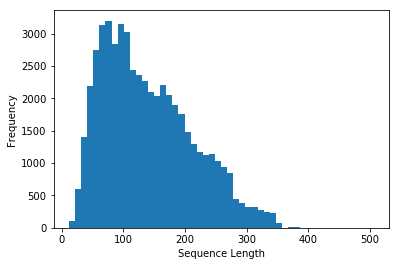

In [249]:
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [13]:
maxSeqLength = 300

In [14]:
strip_special_chars  = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [15]:
ids = np.zeros((quotes_data.shape[0], maxSeqLength), dtype='int32')

fileCounter = 0

id_check = []

for quote in quotes_data['Quote']:
    cleanedLine = cleanSentences(quote)
    split = cleanedLine.split()
    indexCounter = 0
    for word in split:
        try:
            ids[fileCounter][indexCounter] = wordsList.index(word)
            id_check.append(word)
        except ValueError:
            ids[fileCounter][indexCounter] = 399999 #Vector for unknown words
            id_check.append(399999)
        indexCounter = indexCounter + 1
        if indexCounter >= maxSeqLength:
            break
    fileCounter = fileCounter + 1
    print(fileCounter)
np.save('idsMatrix22', ids)

ids = np.load('idsMatrix22.npy')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [93]:
ids.shape

(1998, 200)

## Shuffle and train-test split

First, I want to verify that everything is properly in order. Lets make two dictionaries to go from a label to it's unique index and vice-versa:

In [31]:
labels_encode={}
labels_decode={}
for i, topic in enumerate(final_topics):
    labels_encode[topic] = i
    labels_decode[i] = topic

We then randomly shuffle our dataframe:

In [34]:
quotes_data_shuffle = quotes_data.sample(frac=1)
quotes_data_shuffle.head()

,Quote,Author,Topic
2843,I've always been fascinated with the juxtaposi...,Geoff Downes,amazing
49471,Heresies are experiments in man's unsatisfied ...,H. G. Wells,truth
16229,Just living is not enough... one must have sun...,Hans Christian Anderson,freedom
42196,All men want to be treated like kings in a rel...,Giada De Laurentiis,relationship
34233,"I think because I became a mom later in life, ...",Mariska Hargitay,mom


Pick a quote up by its index in the original dataframe:

In [46]:
quotes_data_shuffle.loc[2843]

Quote     I've always been fascinated with the juxtaposi...
Author                                         Geoff Downes
Topic                                               amazing
Name: 2843, dtype: object

Check its topic in the final topics list:

In [47]:
print(final_topics[2843])

amazing


Check if we have the same quote's wordvec in our ids matrix at the same position:

In [44]:
quote = quotes_data_shuffle.loc[2843]['Quote']
print(quote)


cleanedLine = cleanSentences(quote)
split = cleanedLine.split()
print(split)

print([wordsList.index(word) for word in split])
ids[2843][:50]    

I've always been fascinated with the juxtaposition of technology in music, not only in recording, but in the keyboard. It's amazing the way you can apply technology to an art form.
['ive', 'always', 'been', 'fascinated', 'with', 'the', 'juxtaposition', 'of', 'technology', 'in', 'music', 'not', 'only', 'in', 'recording', 'but', 'in', 'the', 'keyboard', 'its', 'amazing', 'the', 'way', 'you', 'can', 'apply', 'technology', 'to', 'an', 'art', 'form']
[79289, 690, 51, 16610, 17, 201534, 42157, 3, 732, 6, 403, 36, 91, 6, 2683, 34, 6, 201534, 10266, 47, 5772, 201534, 179, 81, 86, 3515, 732, 4, 29, 760, 683]


array([ 79289,    690,     51,  16610,     17, 201534,  42157,      3,
          732,      6,    403,     36,     91,      6,   2683,     34,
            6, 201534,  10266,     47,   5772, 201534,    179,     81,
           86,   3515,    732,      4,     29,    760,    683,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0], dtype=int32)

Everything is in order. Now we can shuffle the ids matrix and topics (labels) together:

In [49]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ids, final_topics, test_size=0.2 , random_state=np.random.seed(), shuffle=True)

## Recurrent Neural Network

In [310]:
batchSize = 24
lstmUnits = 64
numClasses = quotes_data['Topic'].unique().size
iterations = 100000
numDimensions = 300

In [311]:
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [312]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

In [313]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [315]:
value  = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))

prediction = (tf.matmul(last, weight) + bias)

In [316]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [317]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [318]:
tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
with tf.Session() as sess:
    writer = tf.summary.FileWriter(logdir, sess.graph)

In [346]:
labels_y[400]
b = np.zeros(numClasses)
b.shape
b[labels_y[400]] = 1
b

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [351]:
def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(0,len(y_train))
        
        one_hot = np.zeros(numClasses)
        one_hot[labels_y[num]] = 1
        labels.append(one_hot)
        
        arr[i] = ids[indices[num]]
        
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(int((4*len(labels_y))/5),len(labels_y))
        
        b = np.zeros(numClasses)
        b[labels_y[num]] = 1
        labels.append(b)
        
        arr[i] = ids[indices[num]]
        
    return arr, labels

In [352]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
    if (i % 50 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)
    
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)

writer.close()

KeyboardInterrupt: 

## Unknown word frequency

In [296]:
# compute how many times an unknown word has occured

num_39 = 0
id_39 = []

for i, val in enumerate(ids.max(1)):
    if val == 399999:
        num_39+=1
        id_39.append(i)

In [297]:
sum(numWords), num_39

(7406976, 4009)